# Detect Overfitting and Underfitting with Learning Curves

For this quiz, we'll be using three models to train the circular dataset below.

- A Decision Tree model,
- A Logistic Regression model, and
- A Support Vector Machine model.

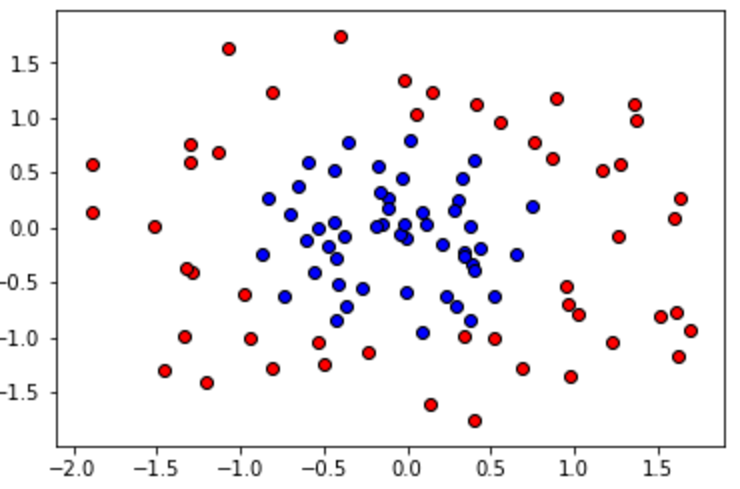

One of the models overfits, one underfits, and the other one is just right. First, we'll write some code to draw the learning curves for each model, and finally we'll look at the learning curves to decide which model is which.

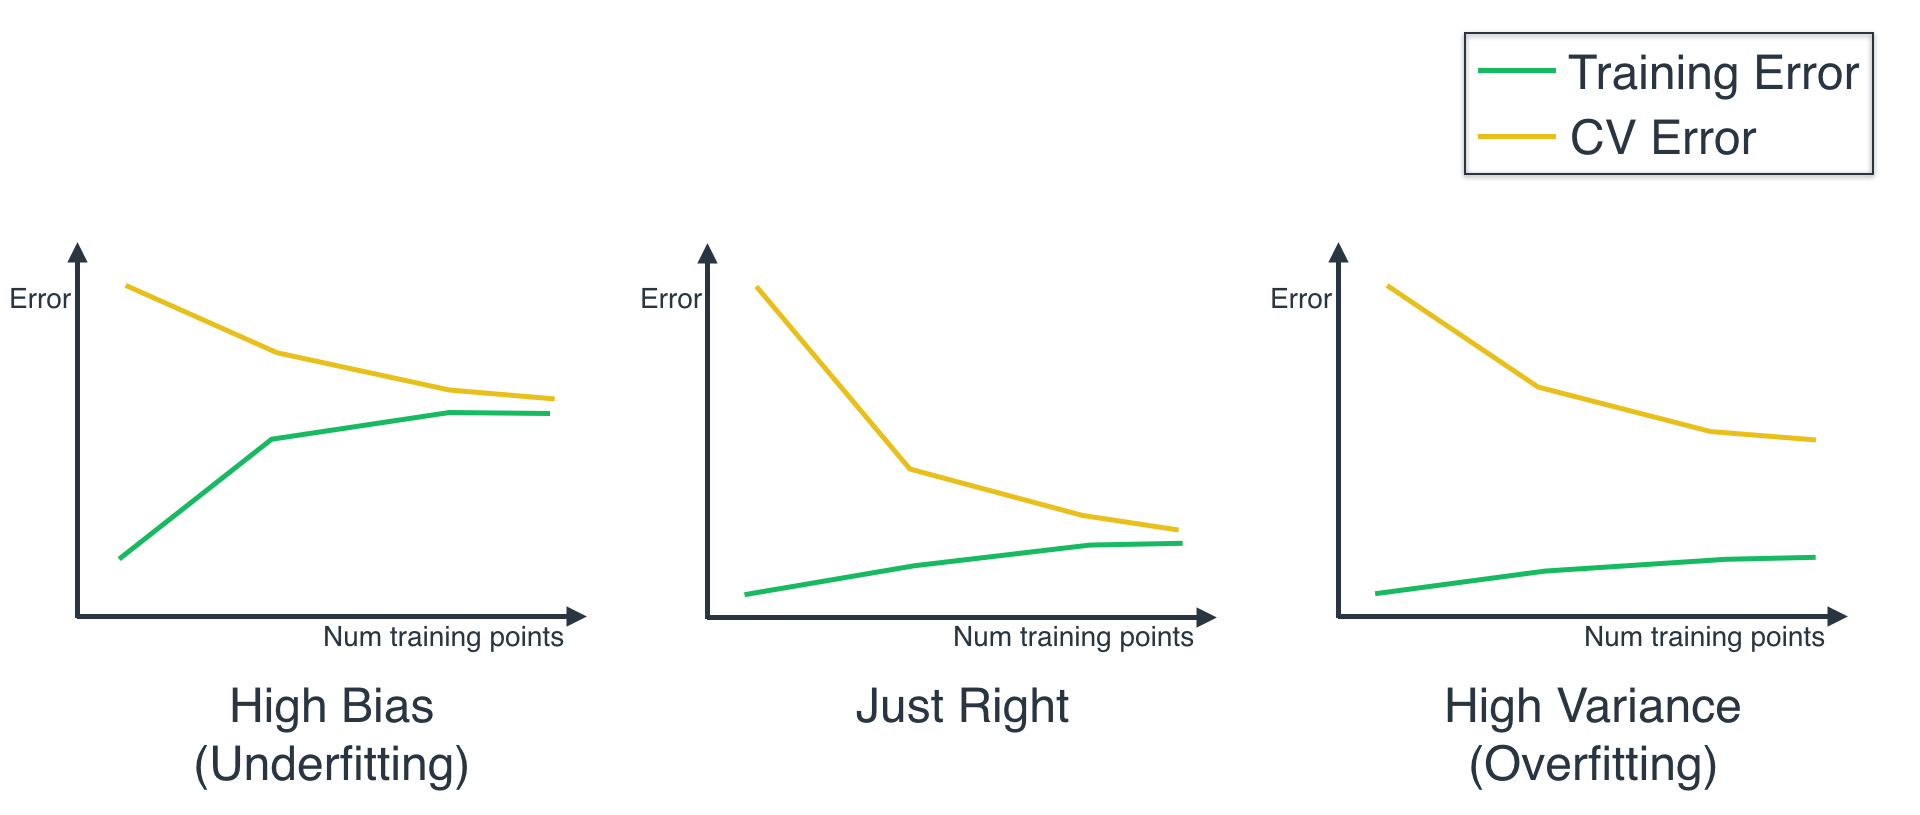

For the first part of the quiz, all you need is to uncomment one of the classifiers, and hit 'Test Run' to see the graph of the Learning Curve. But if you like coding, here are some details. We'll be using the function called `learning_curve`:

```python

train_sizes, train_scores, test_scores = learning_curve(
    estimator, X, y, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings))
```

No need to worry about all the parameters of this function (you can read some more in [here](https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html), but here we'll explain the main ones:

- `estimator`, is the actual classifier we're using for the data, e.g., `LogisticRegression()` or `GradientBoostingClassifier()`.
- `X` and `y` is our data, split into features and labels.
- `train_sizes` are the sizes of the chunks of data used to draw each point in the curve.
- `train_scores` are the training scores for the algorithm trained on each chunk of data.
- `test_scores` are the testing scores for the algorithm trained on each chunk of data.


Two very important observations:

- The training and testing scores come in as a list of 3 values, and this is because the function uses 3-Fold Cross-Validation.
- **Very important**: As you can see, we defined our curves with Training and Testing **Error**, and this function defines them with Training and Testing **Score**. These are opposite, so the higher the error, the lower the score. Thus, when you see the curve, you need to flip it upside down in your mind, in order to compare it with the curves above.

In [3]:
import pandas as pd
spreadsheet = pd.read_csv('./02_data.csv')
spreadsheet.head(10)

,x1,x2,y
0,0.336494,-0.985951,-1.0
1,-0.011043,-0.105529,1.0
2,0.238160,-0.617417,1.0
3,-0.366783,-0.713819,1.0
4,1.221923,-1.039399,-1.0
5,-1.304568,0.592618,-1.0
6,-0.407809,-0.509111,1.0
7,0.893189,1.182860,-1.0
8,-0.005463,-0.589551,1.0
9,0.406424,0.611062,1.0


In [8]:
# Import, read, and split data
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
data = pd.read_csv('./02_data.csv')
import numpy as np
X = np.array(data[['x1', 'x2']])
y = np.array(data['y'])

# Fix random seed
np.random.seed(55)

### Imports
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

### Logistic Regression
estimator_logistic_regression = LogisticRegression()

### Decision Tree
estimator_gradient_boosting = GradientBoostingClassifier()

### Support Vector Machine
estimator_svc = SVC(kernel='rbf', gamma=1000)

In [10]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# It is good to randomize the data before drawing Learning Curves
def randomize(X, Y):
    permutation = np.random.permutation(Y.shape[0])
    X2 = X[permutation,:]
    Y2 = Y[permutation]
    return X2, Y2

X2, y2 = randomize(X, y)

def draw_learning_curves(X, y, estimator, num_trainings):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X2, y2, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.title("Learning Curves")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.plot(train_scores_mean, 'o-', color="g",
             label="Training score")
    plt.plot(test_scores_mean, 'o-', color="y",
             label="Cross-validation score")


    plt.legend(loc="best")

    plt.show()

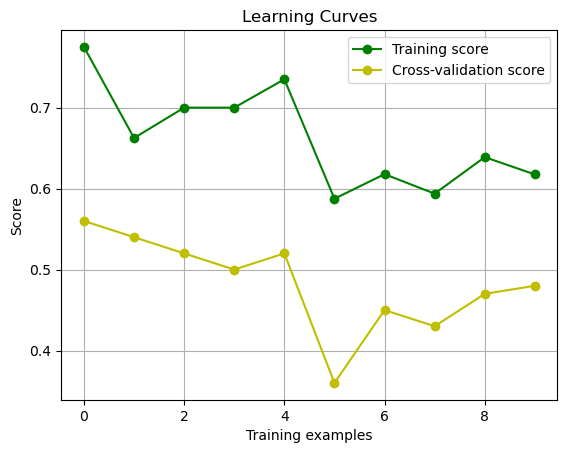

In [37]:
draw_learning_curves(X, y, estimator_logistic_regression, 10 )

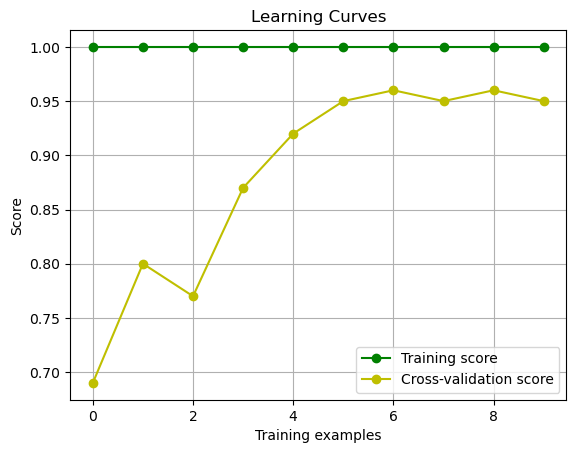

In [15]:
draw_learning_curves(X, y, estimator_gradient_boosting, 10 )

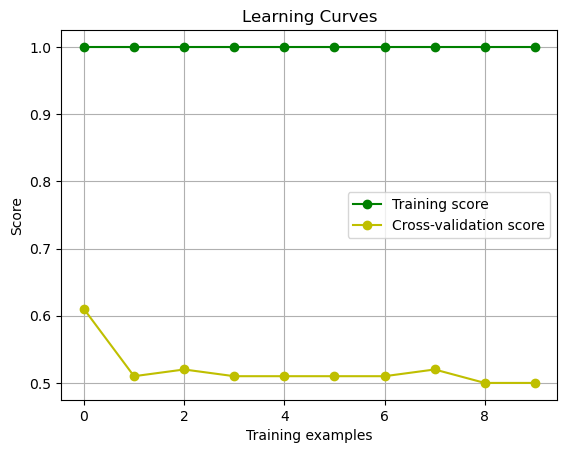

In [16]:
draw_learning_curves(X, y, estimator_svc, 10 )

We can observe from the curves that:

- The **Logistic Regression** model has a low training and testing score.
- The **Decision Tree** model has a high training and testing score.
- The **Support Vector Machine** model has a high training score, and a low testing score.